In [84]:
import numpy as np
import pandas as pd
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)


## Telco Classification Project

### Data Acquisition

In [85]:
# get telco data
df = acquire.get_telco_data()


In [86]:
# view first few rows
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


### Data Preparation

In [87]:
df = prepare.prep_telco(df)
df

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,0,9,65.60,593.30,0,1,1,...,1,0,0,1,0,0,0,0,0,1
1,2,1,1,0,9,59.90,542.40,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,2,1,0,4,73.90,280.85,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,2,1,1,13,98.00,1237.85,1,1,0,...,1,0,1,0,0,1,0,0,1,0
4,2,2,1,1,3,83.90,267.40,0,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,0,13,55.15,742.90,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,1,2,1,0,22,85.10,1873.70,1,1,0,...,0,0,1,0,0,1,0,0,1,0
7040,2,1,1,0,2,50.30,92.75,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7041,2,1,3,0,67,67.85,4627.65,1,1,1,...,0,0,1,0,1,0,0,0,0,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   payment_type_id                        7043 non-null   int64  
 1   internet_service_type_id               7043 non-null   int64  
 2   contract_type_id                       7043 non-null   int64  
 3   senior_citizen                         7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   monthly_charges                        7043 non-null   float64
 6   total_charges                          7043 non-null   float64
 7   gender_encoded                         7043 non-null   int64  
 8   partner_encoded                        7043 non-null   int64  
 9   dependents_encoded                     7043 non-null   int64  
 10  phone_service_encoded                  7043 non-null   int64  
 11  pape

In [89]:
telco_train, telco_validate, telco_test = prepare.my_train_test_split(df,"churn_encoded")
print(telco_train.shape, telco_validate.shape, telco_test.shape)
print(telco_train.describe().T)


(4225, 34) (1409, 34) (1409, 34)
                                        count         mean          std  \
payment_type_id                        4225.0     2.319053     1.151612   
internet_service_type_id               4225.0     1.875976     0.738711   
contract_type_id                       4225.0     1.687101     0.828349   
senior_citizen                         4225.0     0.161893     0.368397   
tenure                                 4225.0    32.500828    24.532563   
monthly_charges                        4225.0    65.056142    30.268493   
total_charges                          4225.0  2298.513598  2271.603284   
gender_encoded                         4225.0     0.508639     0.499985   
partner_encoded                        4225.0     0.488521     0.499927   
dependents_encoded                     4225.0     0.306272     0.460999   
phone_service_encoded                  4225.0     0.906982     0.290492   
paperless_billing_encoded              4225.0     0.593846     0.49

In [90]:
telco_train.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,2.319053,1.875976,1.687101,0.161893,32.500828,65.056142,2298.513598,0.508639,0.488521,0.306272,...,0.392189,0.218462,0.395503,0.216095,0.235503,0.439053,0.218462,0.217515,0.336805,0.224852
std,1.151612,0.738711,0.828349,0.368397,24.532563,30.268493,2271.603284,0.499985,0.499927,0.460999,...,0.488296,0.413251,0.489016,0.411628,0.424363,0.496330,0.413251,0.412604,0.472673,0.417534
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.650000,411.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.400000,1401.150000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,90.150000,3865.450000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
telco_train.columns, telco_validate.columns


(Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
        'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
        'gender_encoded', 'partner_encoded', 'dependents_encoded',
        'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
        'multiple_lines_No phone service', 'multiple_lines_Yes',
        'online_security_No internet service', 'online_security_Yes',
        'online_backup_No internet service', 'online_backup_Yes',
        'device_protection_No internet service', 'device_protection_Yes',
        'tech_support_No internet service', 'tech_support_Yes',
        'streaming_tv_No internet service', 'streaming_tv_Yes',
        'streaming_movies_No internet service', 'streaming_movies_Yes',
        'contract_type_One year', 'contract_type_Two year',
        'internet_service_type_Fiber optic', 'internet_service_type_None',
        'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
        'payment

In [92]:
# X is indepedent variables
# y is target variable

# x and y train
X_telco_train = telco_train.drop(columns = 'churn_encoded')
y_telco_train = telco_train.churn_encoded

# x and y validate
X_telco_validate = telco_validate.drop(columns = 'churn_encoded')
y_telco_validate = telco_validate.churn_encoded

# x and y test
X_telco_test = telco_test.drop(columns = 'churn_encoded')
y_telco_test = telco_test.churn_encoded

In [93]:
# y_train data
y_telco_train.value_counts()

0    3104
1    1121
Name: churn_encoded, dtype: int64

In [94]:
# create a baseline model
telco_baseline = (y_telco_train == 0).mean()
print('The churn baseline is:', telco_baseline)

The churn baseline is: 0.7346745562130178


In [95]:
# baseline model is the mode of target varible that did not churn.
# baseline churn percentage is 73

In [96]:
X_telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   payment_type_id                        4225 non-null   int64  
 1   internet_service_type_id               4225 non-null   int64  
 2   contract_type_id                       4225 non-null   int64  
 3   senior_citizen                         4225 non-null   int64  
 4   tenure                                 4225 non-null   int64  
 5   monthly_charges                        4225 non-null   float64
 6   total_charges                          4225 non-null   float64
 7   gender_encoded                         4225 non-null   int64  
 8   partner_encoded                        4225 non-null   int64  
 9   dependents_encoded                     4225 non-null   int64  
 10  phone_service_encoded                  4225 non-null   int64  
 11  p

### (I) Using Decision Tree

###  I made predictions on the training sample to fit decision tree classifier using decion tree model

In [97]:
# make the thing
model1 = DecisionTreeClassifier(max_depth=1)
# fit the thing
model1.fit(X_telco_train, y_telco_train)
# use the thing
print(f'training score: {model1.score(X_telco_train, y_telco_train):.2%}')
print(f'validate score: {model1.score(X_telco_validate, y_telco_validate):.2%}')

training score: 73.47%
validate score: 73.46%


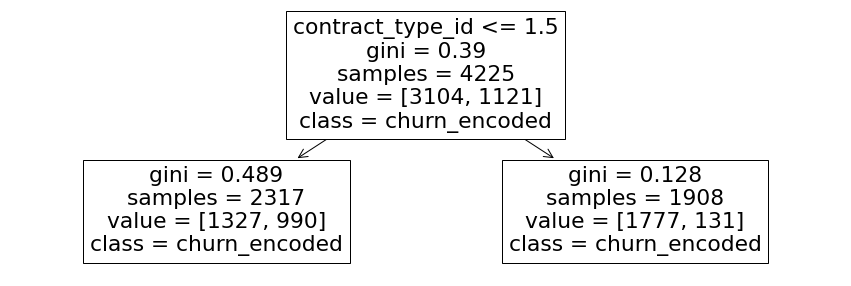

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plot_tree(model1, feature_names=X_telco_train.columns.to_list(), class_names=['churn_encoded']);

In [99]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=1, random_state=123)


In [100]:
# model1.fit(X, y)

clf = clf.fit(X_telco_train, y_telco_train)


In [101]:
# make prediction on train obeservations

y_telco_pred = clf.predict(X_telco_train)
y_telco_pred[0:5]


array([0, 0, 0, 0, 0])

In [102]:
print(classification_report(y_telco_train, y_telco_pred))


              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225



### 3.Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [103]:
#model1 score
model1.score(X_telco_validate,y_telco_validate)

0.7345635202271115

In [104]:
#classification report
print(classification_report(y_telco_train, y_telco_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [105]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_telco_train, y_telco_pred)


array([[3104,    0],
       [1121,    0]])

In [106]:
y_telco_train.value_counts()


0    3104
1    1121
Name: churn_encoded, dtype: int64

In [107]:
import pandas as pd

labels = sorted(y_telco_train.unique())

df1_confused = pd.DataFrame(sklearn.metrics.confusion_matrix(y_telco_train, y_telco_pred), index=labels, columns=labels)
df1_confused


,0,1
0,3104,0
1,1121,0


### 5.Run through steps 2-4 using a different max_depth value.

In [108]:
#model2
# make the thing
model2 = DecisionTreeClassifier(max_depth=3)
# fit the thing
model2.fit(X_telco_train, y_telco_train)
# use the thing
print(f'training score: {model2.score(X_telco_train, y_telco_train):.2%}')
print(f'validate score: {model2.score(X_telco_validate, y_telco_validate):.2%}')

training score: 78.79%
validate score: 79.28%


In [109]:
# model2.fit(X, y)

clf = clf.fit(X_telco_train, y_telco_train)


In [110]:
# make prediction on train obeservations

y_telco_pred = clf.predict(X_telco_train)
y_telco_pred[0:5]


array([0, 0, 0, 0, 0])

In [111]:
print(classification_report(y_telco_train, y_telco_pred))


              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225



In [112]:
#model2 score
model2.score(X_telco_validate,y_telco_validate)

0.7927608232789212

In [113]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_telco_train, y_telco_pred)


array([[3104,    0],
       [1121,    0]])

In [114]:
y_telco_train.value_counts()


0    3104
1    1121
Name: churn_encoded, dtype: int64

### 6. Which model performs better on your in-sample data?

In [115]:
# make a new column in y_preds
y_titanic_pred = clf.predict(X_telco_train)
clf.score(X_telco_train, y_telco_train)

0.7346745562130178

In [116]:
# loop it!
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_telco_train, y_telco_train)
    models.append(model)
    model_scores.append(model.score(X_telco_train, y_telco_train))

### (II) Using Random Forest

In [117]:
# make the thing 
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)

In [118]:
# fit the thing
rf.fit(X_telco_train, y_telco_train)

RandomForestClassifier(max_depth=10)

In [119]:
# use the thing
y_pred = rf.predict(X_telco_train)

In [120]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [121]:
#model evaluation
print(classification_report(y_telco_train, rf.predict(X_telco_train)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3104
           1       0.83      0.69      0.75      1121

    accuracy                           0.88      4225
   macro avg       0.86      0.82      0.84      4225
weighted avg       0.88      0.88      0.88      4225



In [122]:
#evaluate
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_telco_train, y_telco_train)))

Accuracy of random forest classifier on training set: 0.88


In [123]:
y_telco_pred.size

4225

In [124]:
y_telco_train.size

4225

In [125]:
#create a confusion matrix
cm = confusion_matrix(y_telco_train, y_pred)
cm

array([[2939,  165],
       [ 343,  778]])

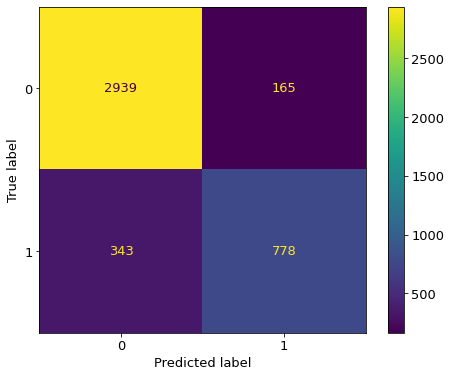

In [126]:
#create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [127]:
#classification report
pd.DataFrame(classification_report(y_telco_train,y_pred,output_dict= True))

,0,1,accuracy,macro avg,weighted avg
precision,0.895491,0.825027,0.879763,0.860259,0.876795
recall,0.946843,0.694023,0.879763,0.820433,0.879763
f1-score,0.920451,0.753876,0.879763,0.837163,0.876254
support,3104.000000,1121.000000,0.879763,4225.000000,4225.000000


In [128]:
#create classification report
rf.score(X_telco_train, y_telco_train)

0.8797633136094675

In [129]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_telco_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(778, 2939, 165, 343)

### (III) Using KNN

In [130]:
# make the thing (default value k5)
knn1 = KNeighborsClassifier()

In [131]:
# fit the thing
knn1.fit(X_telco_train, y_telco_train)

KNeighborsClassifier()

In [132]:
# use the thing
y_pred = knn1.predict(X_telco_train)

In [133]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [134]:
#model evaluation
print(classification_report(y_telco_train, knn1.predict(X_telco_train)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3104
           1       0.73      0.59      0.65      1121

    accuracy                           0.83      4225
   macro avg       0.80      0.76      0.77      4225
weighted avg       0.83      0.83      0.83      4225



In [135]:
#create a confusion matrix
cm = confusion_matrix(y_telco_train, y_pred)
cm

array([[2860,  244],
       [ 461,  660]])

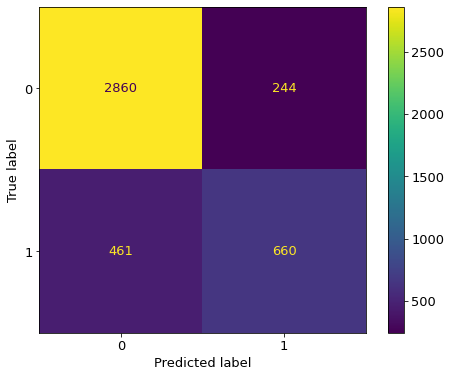

In [136]:
#create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn1.classes_)

disp.plot()
plt.show()

In [137]:
#classification report
pd.DataFrame(classification_report(y_telco_train,y_pred,output_dict= True))

,0,1,accuracy,macro avg,weighted avg
precision,0.861186,0.730088,0.833136,0.795637,0.826403
recall,0.921392,0.588760,0.833136,0.755076,0.833136
f1-score,0.890272,0.651852,0.833136,0.771062,0.827013
support,3104.000000,1121.000000,0.833136,4225.000000,4225.000000


In [138]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_telco_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(660, 2860, 244, 461)

### Data Exploration

In [175]:
telco_train.columns, telco_validate.columns


(Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
        'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
        'gender_encoded', 'partner_encoded', 'dependents_encoded',
        'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
        'multiple_lines_No phone service', 'multiple_lines_Yes',
        'online_security_No internet service', 'online_security_Yes',
        'online_backup_No internet service', 'online_backup_Yes',
        'device_protection_No internet service', 'device_protection_Yes',
        'tech_support_No internet service', 'tech_support_Yes',
        'streaming_tv_No internet service', 'streaming_tv_Yes',
        'streaming_movies_No internet service', 'streaming_movies_Yes',
        'contract_type_One year', 'contract_type_Two year',
        'internet_service_type_Fiber optic', 'internet_service_type_None',
        'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
        'payment

In [176]:
#How does senior citizen correlate to tenure?
#How does device protection correlate to churn?
#How does internet_service_type_id correlate to customers tenure?
#Are customers on a month to month contract more likely to churn?
#Do customers with high monthly charges churn more frequently?
#Do customers with tech support churn less frequently?

#Are customers who have been with Telco a longer time less likely to churn?

#Are customers with automatic payment setup less likely to churn?
#Is there a difference in churn frequency between customers with phone service and those without?
#Is there a relationship between customers who churn and internet service type?
#Is there a relationship between gender and customers who churn?

#With this in mind we are now able to begin preparing and analyzing the data.


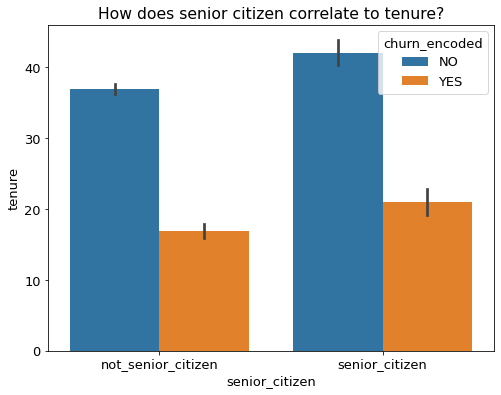

In [177]:
df["senior_citizen"].replace({0:"not_senior_citizen",1:"senior_citizen"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.senior_citizen,y=df.tenure,hue=df.churn_encoded)
plt.title('How does senior citizen correlate to tenure?')
plt.show()

In [178]:
# takeaways

In [179]:
temp0 = acquire.get_telco_data()
temp0.columns
temp0.device_protection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

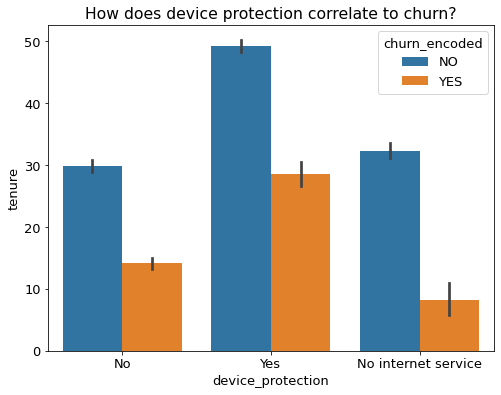

In [180]:
df["device_protection"] = np.where(df["device_protection_Yes"] == 1, "Yes",\
                                    np.where(df["device_protection_No internet service"] == 1, "No internet service", \
                                            "No"))

df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df,  x=df["device_protection"],y=df.tenure,hue=df.churn_encoded)

df.drop(columns=["device_protection"])

plt.title('How does device protection correlate to churn?')
plt.show()

In [181]:
#takeaways

In [182]:
temp0 = acquire.get_telco_data()
temp0.columns
temp0['internet_service_type'].value_counts(),temp0['internet_service_type_id'].value_counts()

(Fiber optic    3096
 DSL            2421
 None           1526
 Name: internet_service_type, dtype: int64,
 2    3096
 1    2421
 3    1526
 Name: internet_service_type_id, dtype: int64)

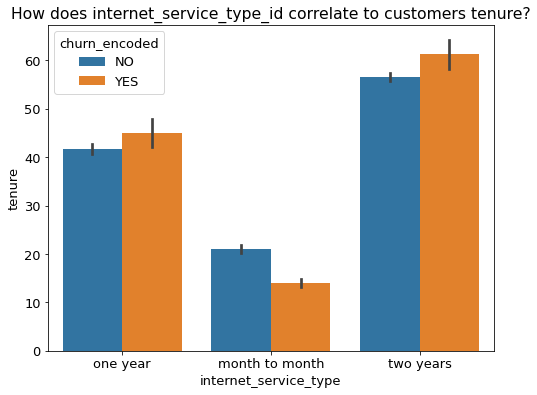

In [183]:

# 1= DSL, 2=Fiber Optic, 3= NONE

df["internet_service_type"] = df.contract_type_id
df["internet_service_type"].replace({3:"NONE",1:"DSL",2:"Fiber Optic"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)

sns.barplot(data=df,  x=df.internet_service_type,y=df.tenure,hue=df.churn_encoded)

df.drop(columns=["internet_service_type"])

plt.title('How does internet_service_type_id correlate to customers tenure?')
plt.show()

In [184]:
# Takeaways

In [185]:
#sns.barplot(data=df, x=df.contract_type,y=df.tenure,hue=df.churn)
#plt.title('How does contract type correlate to customers tenure?')
#plt.show()

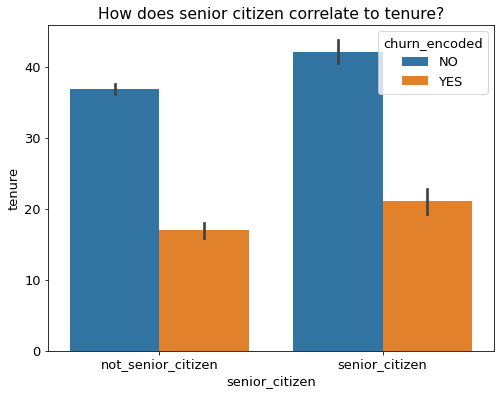

In [186]:
df["senior_citizen"].replace({0:"senior_citizen",1:"not_senior_citizen"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.senior_citizen,y=df.tenure,hue=df.churn_encoded)
plt.title('How does senior citizen correlate to tenure?')
plt.show()

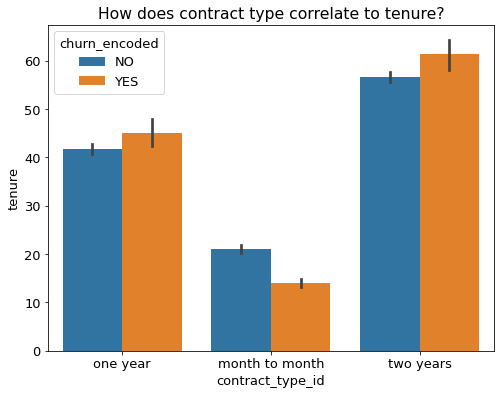

In [187]:
df["contract_type_id"].replace({1:"month to month",2:"one year", 3:"two years"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.contract_type_id,y=df.tenure,hue=df.churn_encoded)
plt.title('How does contract type correlate to tenure?')
plt.show()

In [188]:
#takeaways

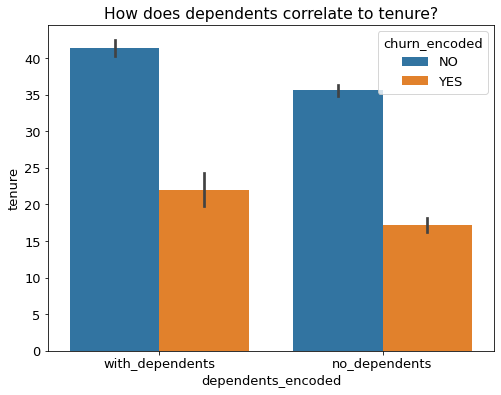

In [189]:
df["dependents_encoded"].replace({0:"no_dependents",1:"with_dependents"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.dependents_encoded,y=df.tenure,hue=df.churn_encoded)
plt.title('How does dependents correlate to tenure?')
plt.show()

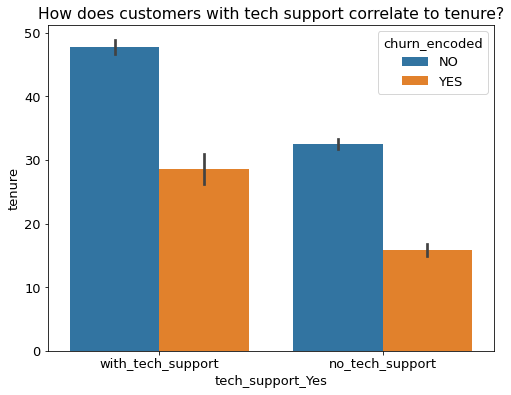

In [191]:
df["tech_support_Yes"].replace({0:"no_tech_support",1:"with_tech_support"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.tech_support_Yes,y=df.tenure,hue=df.churn_encoded)
plt.title('How does customers with tech support correlate to tenure?')
plt.show()

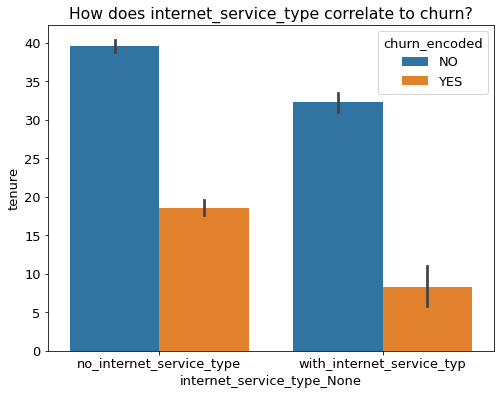

In [194]:
df["internet_service_type_None"].replace({0:"no_internet_service_type",1:"with_internet_service_type"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.internet_service_type_None,y=df.tenure,hue=df.churn_encoded)
plt.title('How does internet_service_type correlate to churn?')
plt.show()

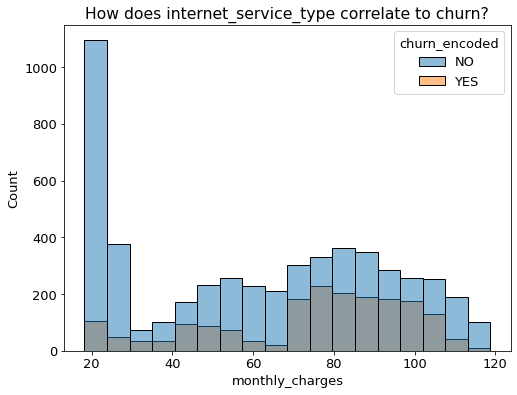

In [202]:
#df["internet_service_type_None"].replace({0:"no_internet_service_type",1:"with_internet_service_type"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.histplot(data=df, x=df.monthly_charges,hue=df.churn_encoded)
plt.title('How does internet_service_type correlate to churn?')
plt.show()

## Telco Churn Classification Project


<hr style="border-top: 50px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### Project Summary
<hr style="border-top: 50px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

#### Project Objectives
> - Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook report.
> - Create modules (acquire.py, prepare.py) that make your process repeateable.
> - Construct a model to predict customer churn using classification techniques.
> - Deliver a 5 minute presentation consisting of a high-level notebook walkthrough using your Jupyter Notebook from above; your presentation should be appropriate for your target audience.
> - Answer panel questions about your code, process, findings and key takeaways, and model.

#### Business Goals
> - Construct a ML classification model that accurately predicts Iris species.
> - Document your process well enough to be presented or read like a report.

#### Audience
> - Codeup Data Science students

#### Project Deliverables
> - A final report notebook 
> - A final report notebook presentation
> - All necessary modules to make my project reproducible

#### Project Context
> - The Iris dataset I'm using came from the Codeup database.
> - Find out more about Fisher's Iris Dataset [here](https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5).


#### Data Dictionary

|Target|Datatype|Definition|
|:-------|:--------|:----------|
| species | 150 non-null: object | iris species - virginica, versicolor, setosa |

|Feature|Datatype|Definition|
|:-------|:--------|:----------|
| petal_length       | 150 non-null: float64 |    iris petal length in cm |
| petal_width        | 150 non-null: float64 |    iris petal width in cm |
| sepal_length       | 150 non-null: float64 |    iris sepal length in cm |
| sepal_width        | 150 non-null: float64 |    iris sepal width in cm |


#### Initial Hypotheses

> - **Hypothesis 1 -**
> - alpha = .05
> - $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  
> - $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 
> - Outcome: I rejected the Null Hypothesis; there is a difference in sepal length between the Virginica and Vericolor Species.

> - **Hypothesis 2 -** 
> - alpha = .05
> - $H_0$: Sepal width is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  
> - $H_a$: Sepal width significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 
> - Outcome: I rejected the Null Hypothesis; there is a difference in sepal width between the Virginica and Versicolor Species.

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### Executive Summary - Conclusions & Next Steps
<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

> - I found that all of the classification models I created, LogisticRegression, DecisionTree, RandomForest, and KNeighbors predicted the species of Iris equally well using the features `sepal_width`, `sepal_length`, `petal_length`, `petal_width`.
> - I chose my DecisionTree model as my best model with a 90% accuracy rate for predicting my target value, species. This model outperformed my baseline score of 33% accuracy, so it has value.
> - Some initial exploration and statistical testing revealed that engineering some new features like petal area or sepal area might help my models predict with even more accuracy, and with more time, I would like to test this hypothesis.

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### Pipeline Stages Breakdown

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

##### Plan
- [x] Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- [x] Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- [x] Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- [x]  Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- [x] Establish a baseline accuracy and document well.
- [x] Train three different classification models.
- [x] Evaluate models on train and validate datasets.
- [x] Choose the model with that performs the best and evaluate that single model on the test dataset.
- [x] Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.
- [x] Document conclusions, takeaways, and next steps in the Final Report Notebook.

___

##### Plan -> Acquire
> - Store functions that are needed to acquire data from the measures and species tables from the iris database on the Codeup data science database server; make sure the acquire.py module contains the necessary imports to run my code.
> - The final function will return a pandas DataFrame.
> - Import the acquire function from the acquire.py module and use it to acquire the data in the Final Report Notebook.
> - Complete some initial data summarization (`.info()`, `.describe()`, `.value_counts()`, ...).
> - Plot distributions of individual variables.
___

##### Plan -> Acquire -> Prepare
> - Store functions needed to prepare the iris data; make sure the module contains the necessary imports to run the code. The final function should do the following:
    - Split the data into train/validate/test.
    - Handle any missing values.
    - Handle erroneous data and/or outliers that need addressing.
    - Encode variables as needed.
    - Create any new features, if made for this project.
> - Import the prepare function from the prepare.py module and use it to prepare the data in the Final Report Notebook.
___

##### Plan -> Acquire -> Prepare -> Explore
> - Answer key questions, my hypotheses, and figure out the features that can be used in a classification model to best predict the target variable, species. 
> - Run at least 2 statistical tests in data exploration. Document my hypotheses, set an alpha before running the tests, and document the findings well.
> - Create visualizations and run statistical tests that work toward discovering variable relationships (independent with independent and independent with dependent). The goal is to identify features that are related to species (the target), identify any data integrity issues, and understand 'how the data works'. If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.
> - Summarize my conclusions, provide clear answers to my specific questions, and summarize any takeaways/action plan from the work above.
___

##### Plan -> Acquire -> Prepare -> Explore -> Model
> - Establish a baseline accuracy to determine if having a model is better than no model and train and compare at least 3 different models. Document these steps well.
> - Train (fit, transform, evaluate) multiple models, varying the algorithm and/or hyperparameters you use.
> - Compare evaluation metrics across all the models you train and select the ones you want to evaluate using your validate dataframe.
> - Feature Selection (after initial iteration through pipeline): Are there any variables that seem to provide limited to no additional information? If so, remove them.
> - Based on the evaluation of the models using the train and validate datasets, choose the best model to try with the test data, once.
> - Test the final model on the out-of-sample data (the testing dataset), summarize the performance, interpret and document the results.
___

##### Plan -> Acquire -> Prepare -> Explore -> Model -> Deliver
> - Introduce myself and my project goals at the very beginning of my notebook walkthrough.
> - Summarize my findings at the beginning like I would for an Executive Summary. (Don't throw everything out that I learned from Storytelling) .
> - Walk Codeup Data Science Team through the analysis I did to answer my questions and that lead to my findings. (Visualize relationships and Document takeaways.) 
> - Clearly call out the questions and answers I am analyzing as well as offer insights and recommendations based on my findings.

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### Reproduce My Project

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

You will need your own env file with database credentials along with all the necessary files listed below to run my final project notebook. 
- [x] Read this README.md
- [ ] Download the aquire.py, prepare.py, and final_report.ipynb files into your working directory
- [ ] Add your own env file to your directory. (user, password, host)
- [ ] Run the final_report.ipynb notebook